In [1]:
import pandas as pd 
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import os
from datetime import datetime
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

In [2]:
# HIT (BA) 데이터 불러오기
os.chdir("C:/Users/kw102/Desktop/project/NOVUS_Futures/Preprocessing/data/hit")
hit_HT = pd.read_csv('hit_HT.csv')
hit_HH = pd.read_csv('hit_HH.csv')
hit_KT = pd.read_csv('hit_KT.csv')
hit_LG = pd.read_csv('hit_LG.csv')
hit_LT = pd.read_csv('hit_LT.csv')
hit_NC = pd.read_csv('hit_NC.csv')
hit_OB = pd.read_csv('hit_OB.csv')
hit_SK = pd.read_csv('hit_SK.csv')
hit_SS = pd.read_csv('hit_SS.csv')
hit_WO = pd.read_csv('hit_WO.csv')

ba_HT = hit_HT.iloc[:,[1,2]]
ba_HH = hit_HH.iloc[:,[1,2]]
ba_KT = hit_KT.iloc[:,[1,2]]
ba_LG = hit_LG.iloc[:,[1,2]]
ba_LT = hit_LT.iloc[:,[1,2]]
ba_NC = hit_NC.iloc[:,[1,2]]
ba_OB = hit_OB.iloc[:,[1,2]]
ba_SK = hit_SK.iloc[:,[1,2]]
ba_SS = hit_SS.iloc[:,[1,2]]
ba_WO = hit_WO.iloc[:,[1,2]]

In [3]:
# PIT (ER) 데이터 불러오기
os.chdir("C:/Users/kw102/Desktop/project/NOVUS_Futures/Preprocessing/data/pit")
pit_HT = pd.read_csv('pit_HT.csv')
pit_HH = pd.read_csv('pit_HH.csv')
pit_KT = pd.read_csv('pit_KT.csv')
pit_LG = pd.read_csv('pit_LG.csv')
pit_LT = pd.read_csv('pit_LT.csv')
pit_NC = pd.read_csv('pit_NC.csv')
pit_OB = pd.read_csv('pit_OB.csv')
pit_SK = pd.read_csv('pit_SK.csv')
pit_SS = pd.read_csv('pit_SS.csv')
pit_WO = pd.read_csv('pit_WO.csv')
er_HT = pit_HT.iloc[:,[1,2]]
er_HH = pit_HH.iloc[:,[1,2]]
er_KT = pit_KT.iloc[:,[1,2]]
er_LG = pit_LG.iloc[:,[1,2]]
er_LT = pit_LT.iloc[:,[1,2]]
er_NC = pit_NC.iloc[:,[1,2]]
er_OB = pit_OB.iloc[:,[1,2]]
er_SK = pit_SK.iloc[:,[1,2]]
er_SS = pit_SS.iloc[:,[1,2]]
er_WO = pit_WO.iloc[:,[1,2]]

In [4]:
# PIT (WLS) 데이터 불러오기
wls_HT = pit_HT.iloc[:,[1,3]]
wls_HH = pit_HH.iloc[:,[1,3]]
wls_KT = pit_KT.iloc[:,[1,3]]
wls_LG = pit_LG.iloc[:,[1,3]]
wls_LT = pit_LT.iloc[:,[1,3]]
wls_NC = pit_NC.iloc[:,[1,3]]
wls_OB = pit_OB.iloc[:,[1,3]]
wls_SK = pit_SK.iloc[:,[1,3]]
wls_SS = pit_SS.iloc[:,[1,3]]
wls_WO = pit_WO.iloc[:,[1,3]]

In [5]:
#모델링
def modeling(data,order,steps,trend='c'):
    data = data.iloc[:,1]
    model = ARIMA(data,order=order)
    model_fit = model.fit(trend=trend,full_output=True,disp=True)
    print("{}\n".format(model_fit.summary()))
    fore = model_fit.forecast(steps=steps)
    f = pd.DataFrame(fore[0])
    f.index = pd.RangeIndex(start=len(data),stop=len(data)+steps,step=1)
    model_fit.plot_predict()
    plt.plot(f)
    print("예측값",f)

# 잔여경기수
HH 10
HT 12
KT 9
LG 7
LT 9
NC 7
OB 12
SK 9
SS 11
WO 9

# BA(hit)
HH 2,0,2<br>
HT 1,0,2<br>
KT 2,1,0<br>
LG 2,0,0<br>
LT 2,0,4<br>
NC 1,0,0<br>
OB 1,0,4<br>
SK 2,1,0<br>
SS 0,2,1<br>
WO 4,0,3<br>


                              ARMA Model Results                              
Dep. Variable:                     BA   No. Observations:                  112
Model:                     ARMA(2, 2)   Log Likelihood                 384.622
Method:                       css-mle   S.D. of innovations              0.008
Date:                Sat, 26 Sep 2020   AIC                           -757.245
Time:                        00:54:23   BIC                           -740.934
Sample:                             0   HQIC                          -750.627
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2348      0.008     30.579      0.000       0.220       0.250
ar.L1.BA       0.3913      0.240      1.631      0.103      -0.079       0.862
ar.L2.BA       0.4922      0.229      2.146      0.0

<IPython.core.display.Javascript object>


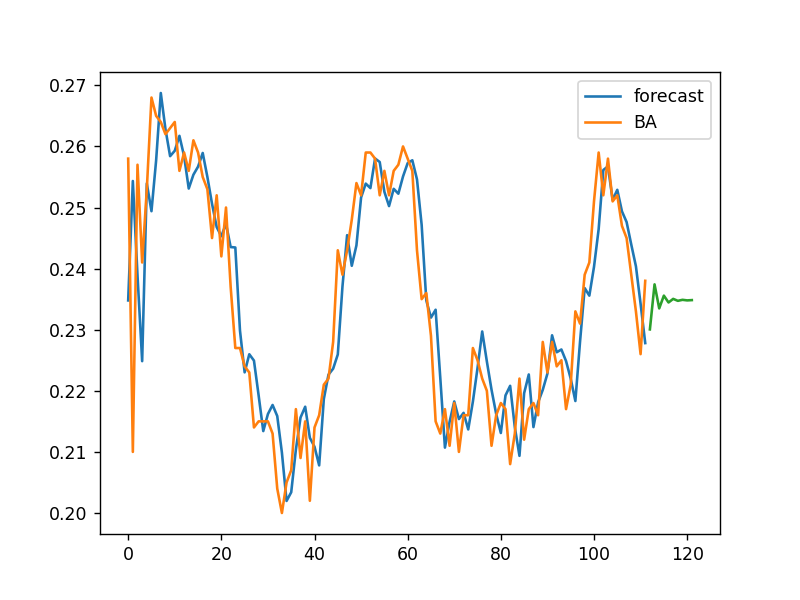

예측값             0
112  0.230051
113  0.237423
114  0.233488
115  0.235576
116  0.234457
117  0.235047
118  0.234727
119  0.234892
120  0.234799
121  0.234843


In [13]:
#한화 BA
modeling(ba_HH,(2,0,2),10)

                              ARMA Model Results                              
Dep. Variable:                     BA   No. Observations:                  109
Model:                     ARMA(1, 2)   Log Likelihood                 347.943
Method:                       css-mle   S.D. of innovations              0.010
Date:                Sat, 26 Sep 2020   AIC                           -685.887
Time:                        01:02:26   BIC                           -672.430
Sample:                             0   HQIC                          -680.430
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2620      0.009     29.878      0.000       0.245       0.279
ar.L1.BA       0.9280      0.056     16.543      0.000       0.818       1.038
ma.L1.BA       0.1414      0.112      1.265      0.2

<IPython.core.display.Javascript object>


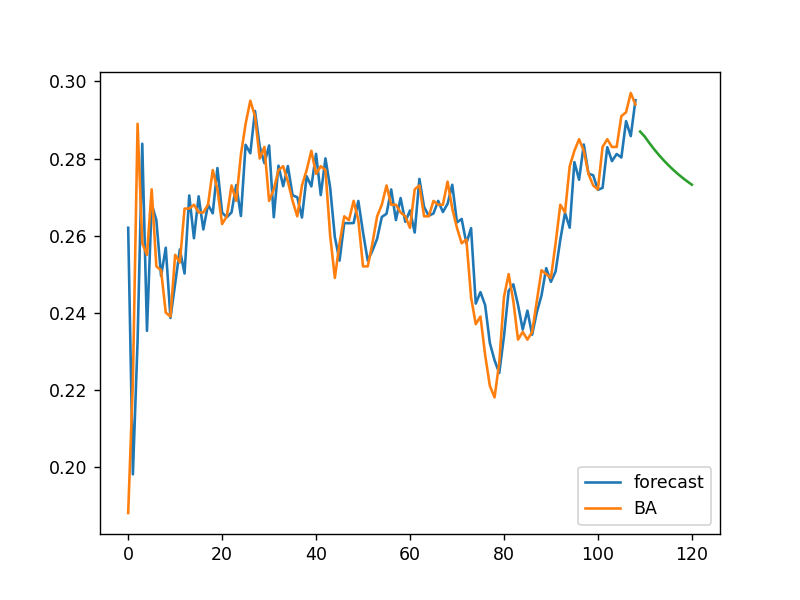

예측값             0
109  0.286989
110  0.285649
111  0.283947
112  0.282368
113  0.280903
114  0.279544
115  0.278282
116  0.277111
117  0.276025
118  0.275017
119  0.274081
120  0.273213


In [26]:
#기아 BA
modeling(ba_HT,(1,0,2),12,'c')

                             ARIMA Model Results                              
Dep. Variable:                   D.BA   No. Observations:                  110
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 355.761
Method:                       css-mle   S.D. of innovations              0.010
Date:                Sat, 26 Sep 2020   AIC                           -705.523
Time:                        01:02:32   BIC                           -697.421
Sample:                             1   HQIC                          -702.237
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.BA     0.2161      0.098      2.216      0.027       0.025       0.407
ar.L2.D.BA     0.1811      0.097      1.861      0.063      -0.010       0.372
                                    Roots           

<IPython.core.display.Javascript object>


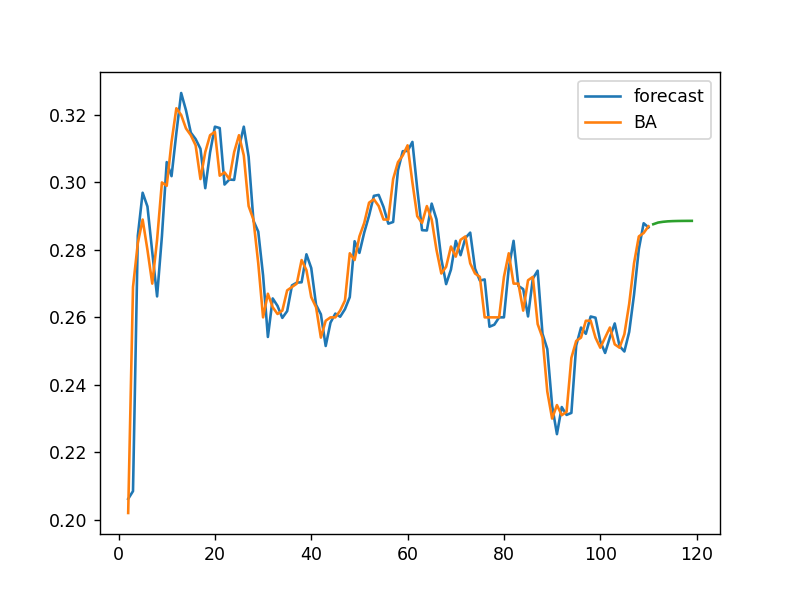

예측값             0
111  0.287613
112  0.288108
113  0.288326
114  0.288463
115  0.288532
116  0.288571
117  0.288592
118  0.288604
119  0.288610


In [27]:
#KT BA
modeling(ba_KT,(2,1,0),9,'nc')

                              ARMA Model Results                              
Dep. Variable:                     BA   No. Observations:                  113
Model:                     ARMA(2, 0)   Log Likelihood                 367.203
Method:                       css-mle   S.D. of innovations              0.009
Date:                Sat, 26 Sep 2020   AIC                           -726.407
Time:                        01:02:41   BIC                           -715.497
Sample:                             0   HQIC                          -721.980
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2787      0.005     61.489      0.000       0.270       0.288
ar.L1.BA       1.1319      0.128      8.839      0.000       0.881       1.383
ar.L2.BA      -0.3237      0.128     -2.521      0.0

<IPython.core.display.Javascript object>


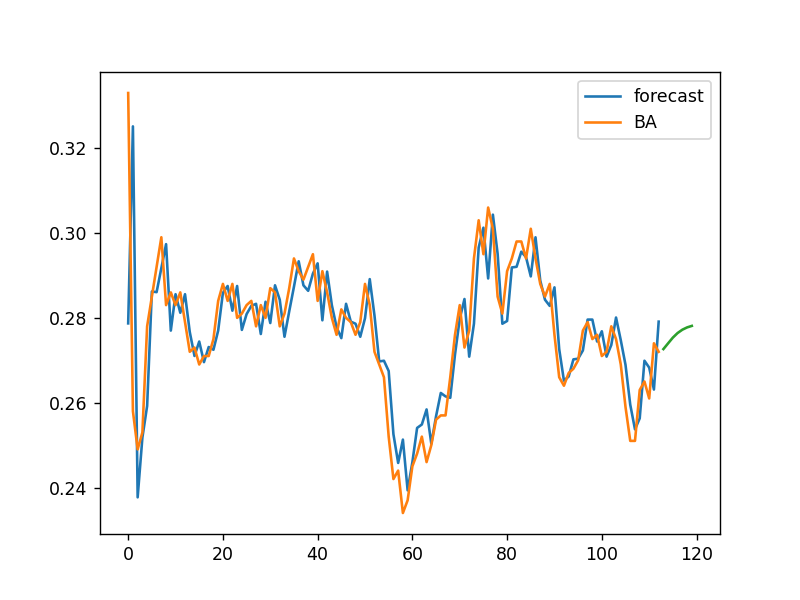

예측값             0
113  0.272637
114  0.274004
115  0.275347
116  0.276423
117  0.277207
118  0.277746
119  0.278103


In [28]:
#LG BA
modeling(ba_LG,(2,0,0),7)

                              ARMA Model Results                              
Dep. Variable:                     BA   No. Observations:                  110
Model:                     ARMA(2, 4)   Log Likelihood                 377.968
Method:                       css-mle   S.D. of innovations              0.008
Date:                Sat, 26 Sep 2020   AIC                           -739.936
Time:                        01:06:10   BIC                           -718.333
Sample:                             0   HQIC                          -731.174
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2668      0.006     45.199      0.000       0.255       0.278
ar.L1.BA       1.7050      0.139     12.262      0.000       1.433       1.978
ar.L2.BA      -0.8043      0.138     -5.815      0.0

<IPython.core.display.Javascript object>


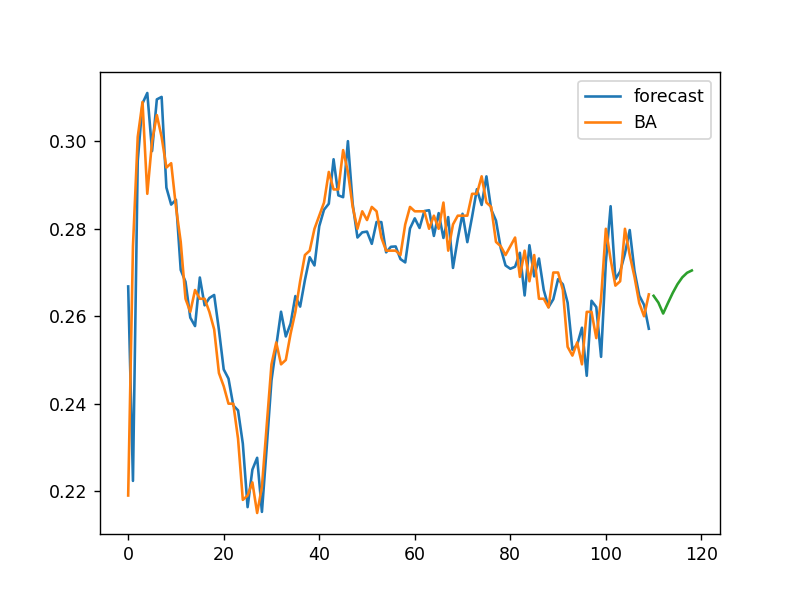

예측값             0
110  0.264672
111  0.263119
112  0.260621
113  0.263019
114  0.265325
115  0.267327
116  0.268886
117  0.269935
118  0.270468


In [42]:
#롯데 BA
modeling(ba_LT,(2,0,4),9)

                              ARMA Model Results                              
Dep. Variable:                     BA   No. Observations:                  110
Model:                     ARMA(1, 0)   Log Likelihood                 387.947
Method:                       css-mle   S.D. of innovations              0.007
Date:                Sat, 26 Sep 2020   AIC                           -769.895
Time:                        01:23:43   BIC                           -761.793
Sample:                             0   HQIC                          -766.609
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2722      0.018     15.150      0.000       0.237       0.307
ar.L1.BA       0.9666      0.030     32.672      0.000       0.909       1.025
                                    Roots           

<IPython.core.display.Javascript object>


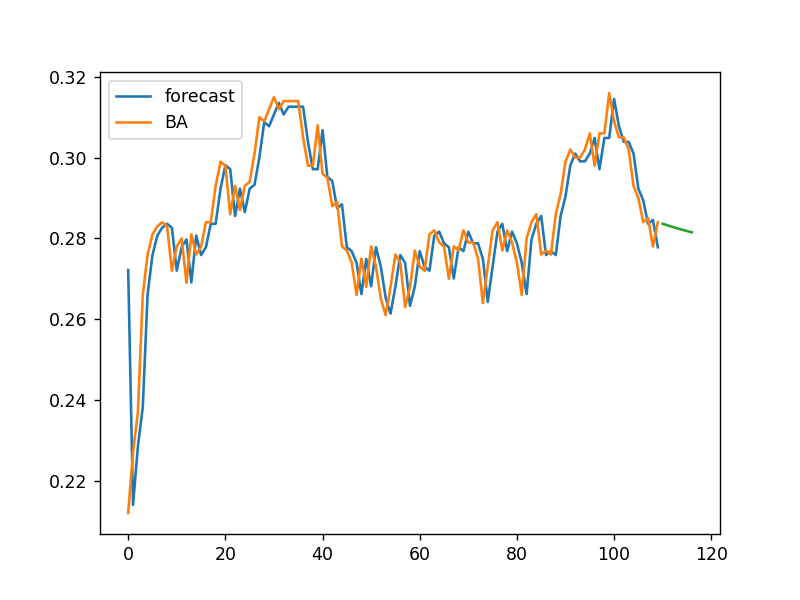

예측값             0
110  0.283605
111  0.283224
112  0.282855
113  0.282498
114  0.282154
115  0.281821
116  0.281499


In [57]:
#NC BA
modeling(ba_NC,(1,0,0),7)

                              ARMA Model Results                              
Dep. Variable:                     BA   No. Observations:                  112
Model:                     ARMA(1, 4)   Log Likelihood                 360.897
Method:                       css-mle   S.D. of innovations              0.010
Date:                Sat, 26 Sep 2020   AIC                           -707.794
Time:                        01:23:34   BIC                           -688.764
Sample:                             0   HQIC                          -700.073
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2846      0.007     42.242      0.000       0.271       0.298
ar.L1.BA       0.6462      0.134      4.827      0.000       0.384       0.909
ma.L1.BA       0.4539      0.123      3.687      0.0

<IPython.core.display.Javascript object>


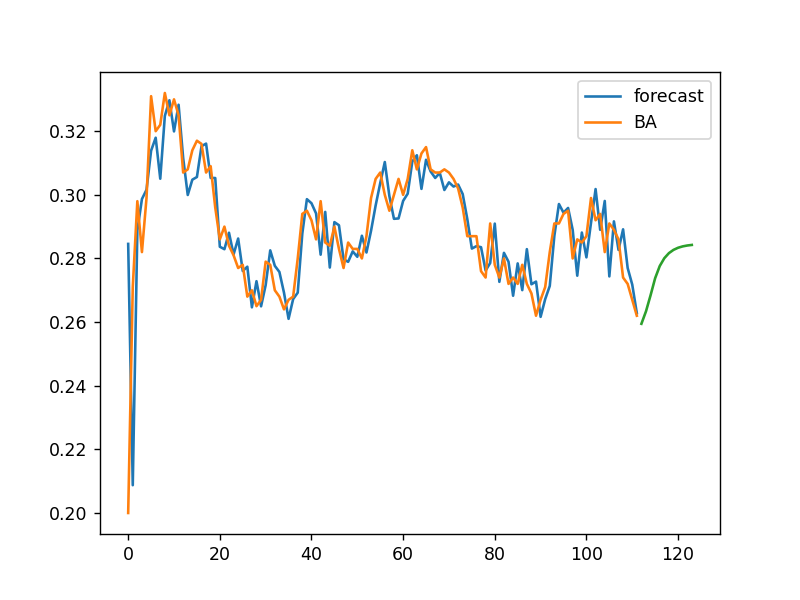

예측값             0
112  0.259467
113  0.263392
114  0.268439
115  0.273813
116  0.277620
117  0.280081
118  0.281671
119  0.282698
120  0.283362
121  0.283791
122  0.284069
123  0.284248


In [56]:
#OB BA
modeling(ba_OB,(1,0,4),12)

                             ARIMA Model Results                              
Dep. Variable:                   D.BA   No. Observations:                  113
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 346.393
Method:                       css-mle   S.D. of innovations              0.011
Date:                Sat, 26 Sep 2020   AIC                           -686.786
Time:                        01:39:35   BIC                           -678.604
Sample:                             1   HQIC                          -683.466
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.BA     0.8073      0.107      7.513      0.000       0.597       1.018
ar.L2.D.BA    -0.2627      0.142     -1.850      0.064      -0.541       0.016
                                    Roots           

<IPython.core.display.Javascript object>


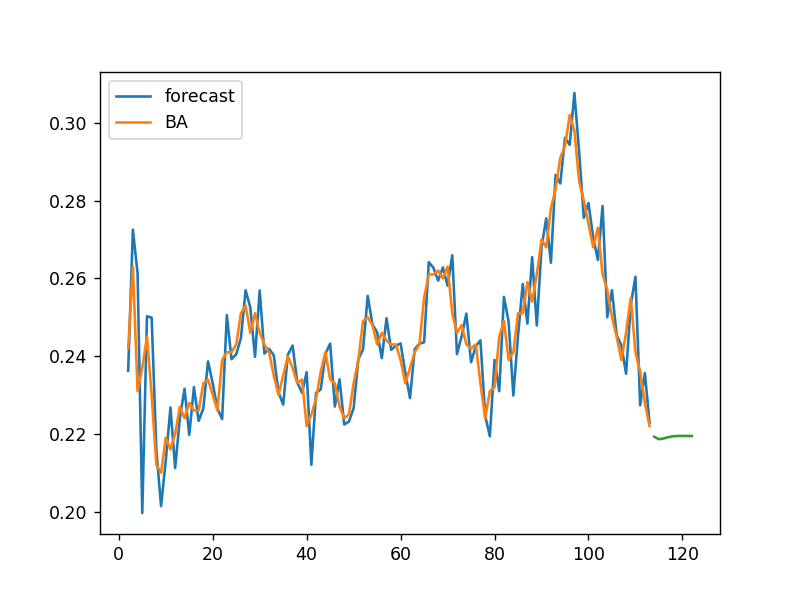

예측값             0
114  0.219258
115  0.218620
116  0.218825
117  0.219158
118  0.219373
119  0.219460
120  0.219473
121  0.219460
122  0.219447


In [60]:
#SK BA
modeling(ba_SK,(2,1,0),9,'nc')

                             ARIMA Model Results                              
Dep. Variable:                  D2.BA   No. Observations:                  110
Model:                 ARIMA(0, 2, 1)   Log Likelihood                 383.239
Method:                       css-mle   S.D. of innovations              0.007
Date:                Sat, 26 Sep 2020   AIC                           -762.478
Time:                        01:41:14   BIC                           -757.077
Sample:                             2   HQIC                          -760.288
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ma.L1.D2.BA    -0.8526      0.054    -15.768      0.000      -0.959      -0.747
                                    Roots                                    
                  Real          Imaginary         

<IPython.core.display.Javascript object>


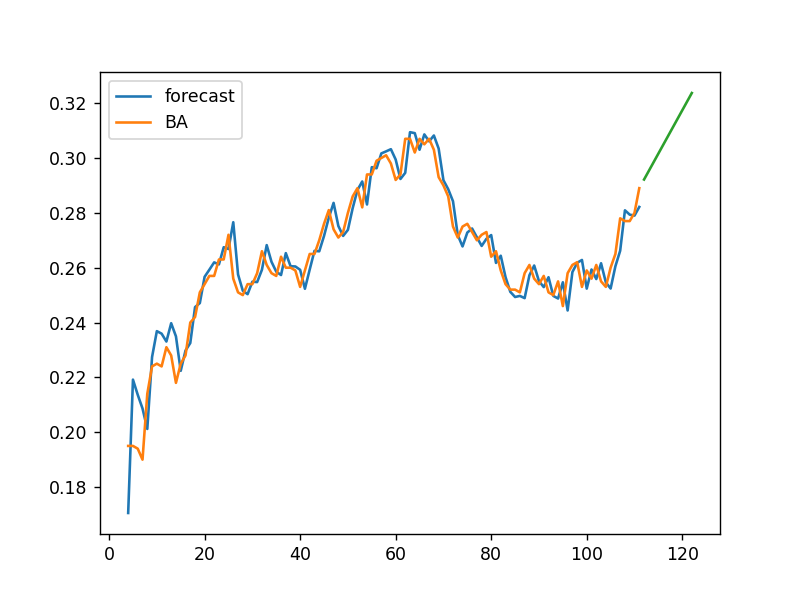

예측값             0
112  0.292155
113  0.295310
114  0.298466
115  0.301621
116  0.304776
117  0.307931
118  0.311087
119  0.314242
120  0.317397
121  0.320552
122  0.323708


In [66]:
#SS BA
modeling(ba_SS,(0,2,1),11,'nC')

                              ARMA Model Results                              
Dep. Variable:                     BA   No. Observations:                  117
Model:                     ARMA(4, 3)   Log Likelihood                 411.833
Method:                       css-mle   S.D. of innovations              0.007
Date:                Sat, 26 Sep 2020   AIC                           -805.667
Time:                        01:43:23   BIC                           -780.807
Sample:                             0   HQIC                          -795.574
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2678      0.001    321.423      0.000       0.266       0.269
ar.L1.BA       0.7107      0.073      9.680      0.000       0.567       0.855
ar.L2.BA       0.4449      0.108      4.126      0.0

<IPython.core.display.Javascript object>


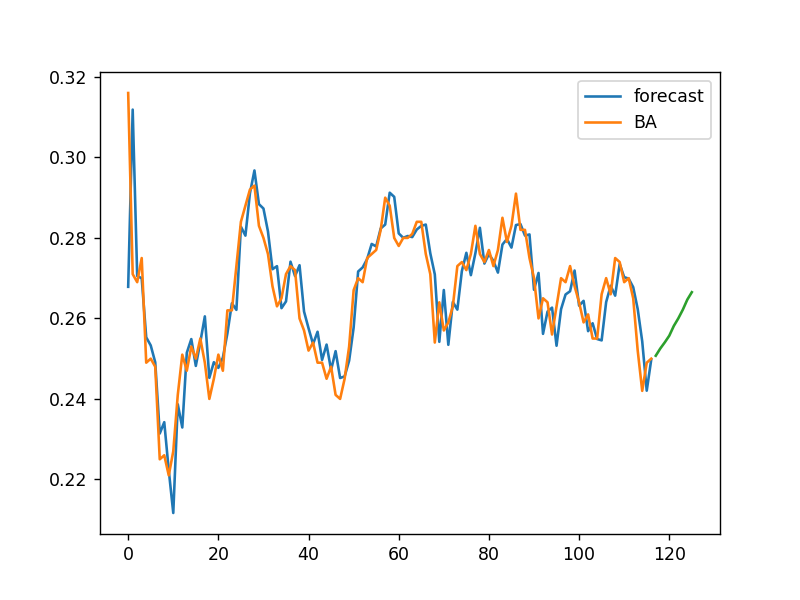

예측값             0
117  0.250726
118  0.252510
119  0.254042
120  0.255702
121  0.258116
122  0.260001
123  0.262158
124  0.264667
125  0.266512


In [69]:
#WO BA
modeling(ba_WO,(4,0,3),9)


# ER(PIT)
HH 201 <br>
HT 112<br>
KT 010<br>
LG 102<br>
LT 100<br>
NC 210<br>
OB 211<br>
SK 011<br>
SS 010<br>
WO 101<br>


                              ARMA Model Results                              
Dep. Variable:                     ER   No. Observations:                  110
Model:                     ARMA(2, 1)   Log Likelihood                 -44.164
Method:                       css-mle   S.D. of innovations              0.354
Date:                Sat, 26 Sep 2020   AIC                             98.328
Time:                        01:44:40   BIC                            111.830
Sample:                             0   HQIC                           103.804
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2368      1.270      3.336      0.001       1.748       6.726
ar.L1.ER       1.9676      0.048     40.773      0.000       1.873       2.062
ar.L2.ER      -0.9720      0.048    -20.345      0.0

<IPython.core.display.Javascript object>


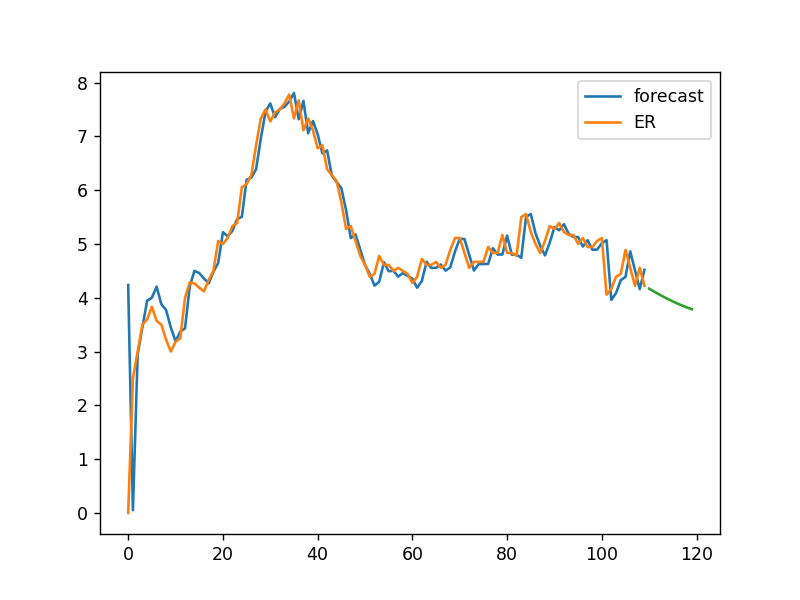

예측값             0
110  4.168585
111  4.116964
112  4.067313
113  4.019792
114  3.974548
115  3.931715
116  3.891412
117  3.853743
118  3.818799
119  3.786654


In [71]:
#HH ER
modeling(er_HH,(2,0,1),10)

                             ARIMA Model Results                              
Dep. Variable:                   D.ER   No. Observations:                  108
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 -74.501
Method:                       css-mle   S.D. of innovations              0.479
Date:                Sat, 26 Sep 2020   AIC                            157.002
Time:                        01:45:08   BIC                            167.731
Sample:                             1   HQIC                           161.352
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.ER    -0.8058      0.169     -4.773      0.000      -1.137      -0.475
ma.L1.D.ER     1.1079      0.128      8.638      0.000       0.857       1.359
ma.L2.D.ER     0.6470      0.076      8.467      0.0

<IPython.core.display.Javascript object>


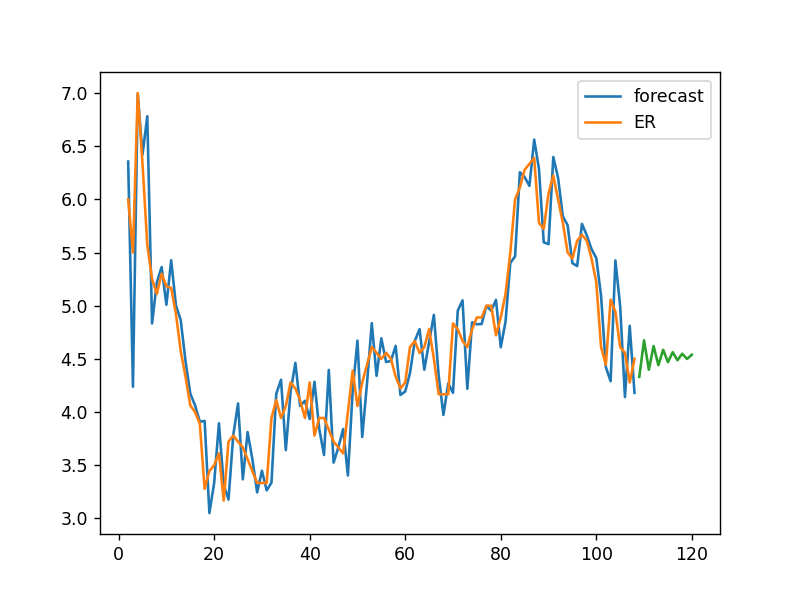

예측값             0
109  4.330714
110  4.674135
111  4.397421
112  4.620385
113  4.440730
114  4.585489
115  4.468848
116  4.562832
117  4.487104
118  4.548123
119  4.498956
120  4.538572


In [74]:
#HT ER
modeling(er_HT,(1,1,2),12,'NC')

                             ARIMA Model Results                              
Dep. Variable:                   D.ER   No. Observations:                  111
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -34.674
Method:                       css-mle   S.D. of innovations              0.331
Date:                Sat, 26 Sep 2020   AIC                             73.347
Time:                        01:49:58   BIC                             78.766
Sample:                             1   HQIC                            75.546
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.D.ER    -0.1070      0.099     -1.080      0.280      -0.301       0.087
                                    Roots                                    
                  Real          Imaginary           M

<IPython.core.display.Javascript object>


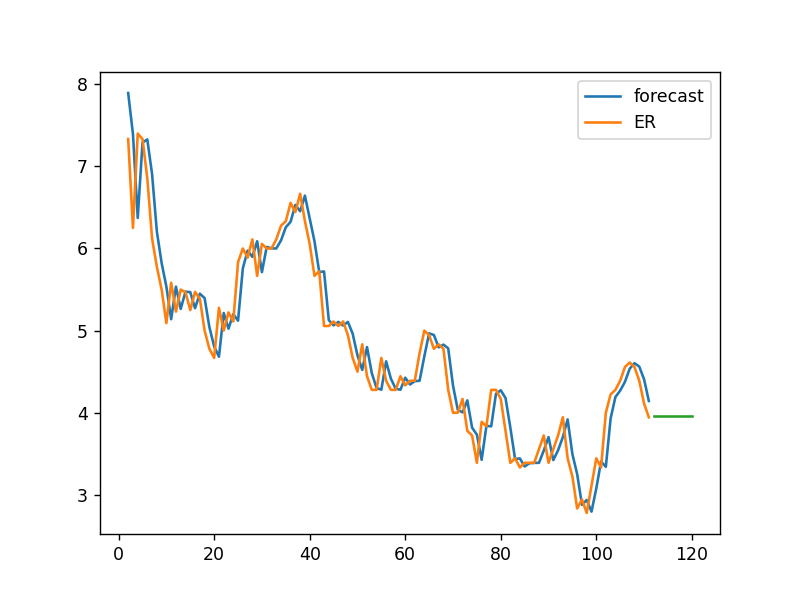

예측값            0
112  3.96527
113  3.96527
114  3.96527
115  3.96527
116  3.96527
117  3.96527
118  3.96527
119  3.96527
120  3.96527


In [76]:
#KT ER
modeling(er_KT,(0,1,1),9,'nc')

                              ARMA Model Results                              
Dep. Variable:                     ER   No. Observations:                  113
Model:                     ARMA(1, 2)   Log Likelihood                 -40.403
Method:                       css-mle   S.D. of innovations              0.343
Date:                Sat, 26 Sep 2020   AIC                             90.805
Time:                        11:30:18   BIC                            104.442
Sample:                             0   HQIC                            96.339
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3780      0.260     16.836      0.000       3.868       4.888
ar.L1.ER       0.8058      0.076     10.620      0.000       0.657       0.955
ma.L1.ER       0.3068      0.108      2.844      0.0

<IPython.core.display.Javascript object>


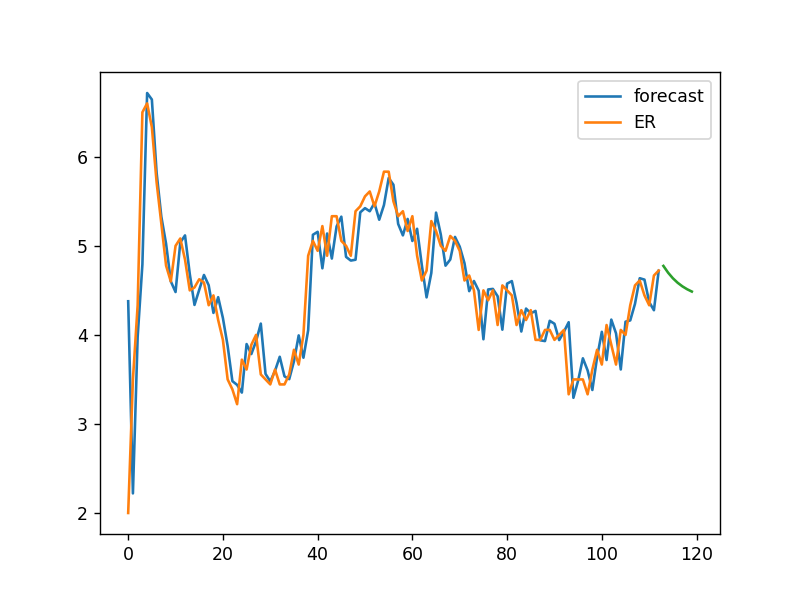

예측값             0
113  4.774576
114  4.698293
115  4.636097
116  4.585980
117  4.545595
118  4.513053
119  4.486832


In [12]:
#LG ER
modeling(er_LG,(1,0,2),7)

                              ARMA Model Results                              
Dep. Variable:                     ER   No. Observations:                  110
Model:                     ARMA(1, 0)   Log Likelihood                 -36.496
Method:                       css-mle   S.D. of innovations              0.334
Date:                Sat, 26 Sep 2020   AIC                             78.992
Time:                        11:31:06   BIC                             87.093
Sample:                             0   HQIC                            82.278
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3589      0.382     11.401      0.000       3.610       5.108
ar.L1.ER       0.9216      0.045     20.657      0.000       0.834       1.009
                                    Roots           

<IPython.core.display.Javascript object>


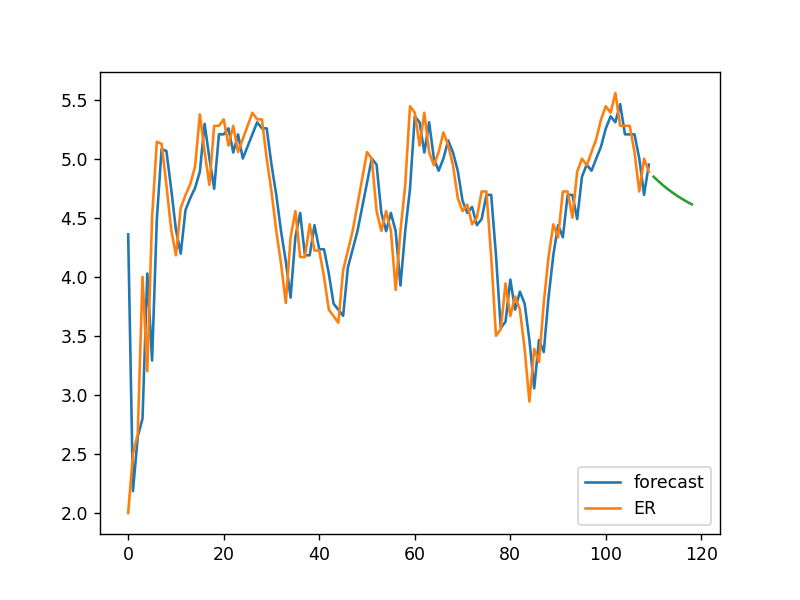

예측값             0
110  4.847453
111  4.809163
112  4.773873
113  4.741349
114  4.711374
115  4.683748
116  4.658287
117  4.634821
118  4.613195


In [14]:
#LT ER
modeling(er_LT,(1,0,0),9)

                             ARIMA Model Results                              
Dep. Variable:                   D.ER   No. Observations:                  109
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 -33.920
Method:                       css-mle   S.D. of innovations              0.330
Date:                Sat, 26 Sep 2020   AIC                             73.839
Time:                        11:31:58   BIC                             81.913
Sample:                             1   HQIC                            77.114
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.ER     0.1692      0.102      1.653      0.098      -0.031       0.370
ar.L2.D.ER     0.2153      0.102      2.102      0.036       0.015       0.416
                                    Roots           

<IPython.core.display.Javascript object>


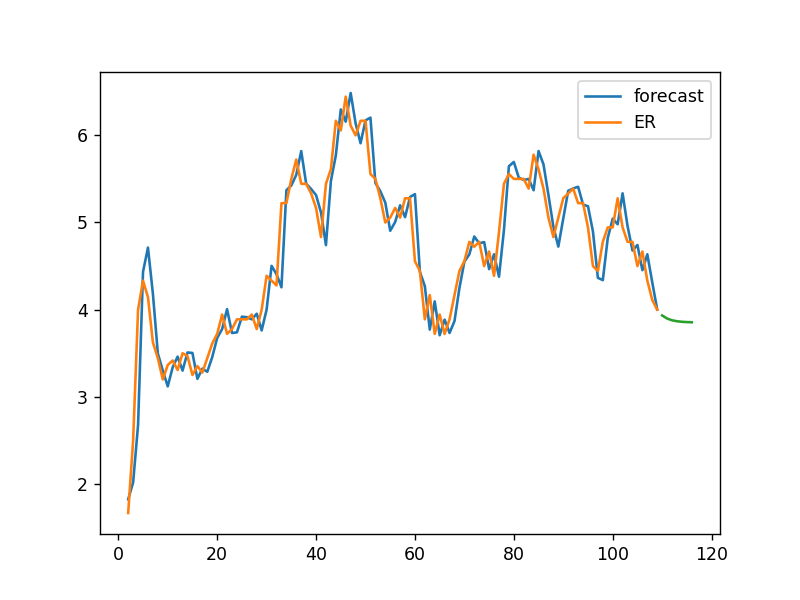

예측값             0
110  3.933432
111  3.898275
112  3.877997
113  3.866998
114  3.860772
115  3.857351
116  3.855432


In [17]:
#NC ER
modeling(er_NC,(2,1,0),7,'nc')

                             ARIMA Model Results                              
Dep. Variable:                   D.ER   No. Observations:                  111
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 -57.156
Method:                       css-mle   S.D. of innovations              0.402
Date:                Sat, 26 Sep 2020   AIC                            122.312
Time:                        11:32:21   BIC                            133.150
Sample:                             1   HQIC                           126.709
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.ER     0.7220      0.153      4.720      0.000       0.422       1.022
ar.L2.D.ER    -0.7015      0.108     -6.519      0.000      -0.912      -0.491
ma.L1.D.ER    -0.5594      0.135     -4.139      0.0

<IPython.core.display.Javascript object>


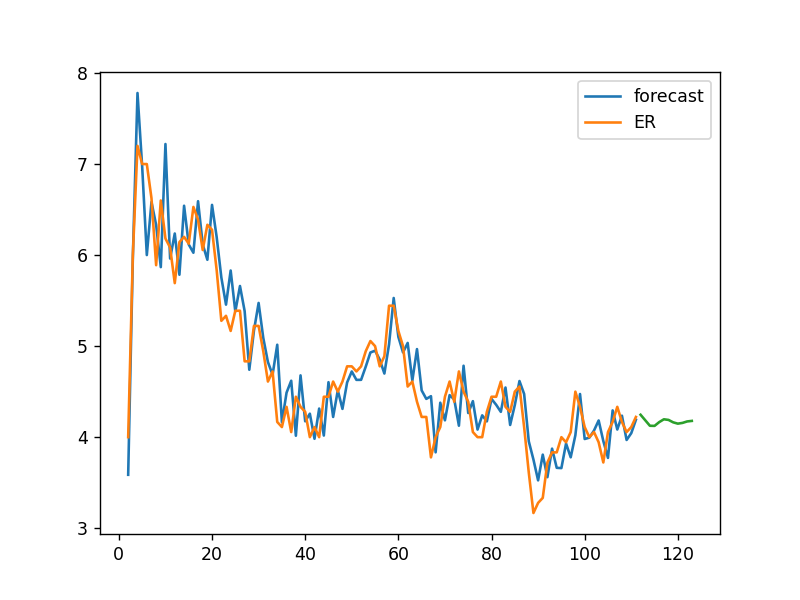

예측값             0
112  4.246179
113  4.185770
114  4.125197
115  4.123841
116  4.165354
117  4.196275
118  4.189478
119  4.162880
120  4.148446
121  4.156683
122  4.172755
123  4.178580


In [20]:
#OB ER
modeling(er_OB,(2,1,1),12,'NC')

                             ARIMA Model Results                              
Dep. Variable:                   D.ER   No. Observations:                  113
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -39.492
Method:                       css-mle   S.D. of innovations              0.343
Date:                Sat, 26 Sep 2020   AIC                             82.984
Time:                        11:33:39   BIC                             88.439
Sample:                             1   HQIC                            85.198
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.D.ER     0.2533      0.105      2.420      0.016       0.048       0.459
                                    Roots                                    
                  Real          Imaginary           M

<IPython.core.display.Javascript object>


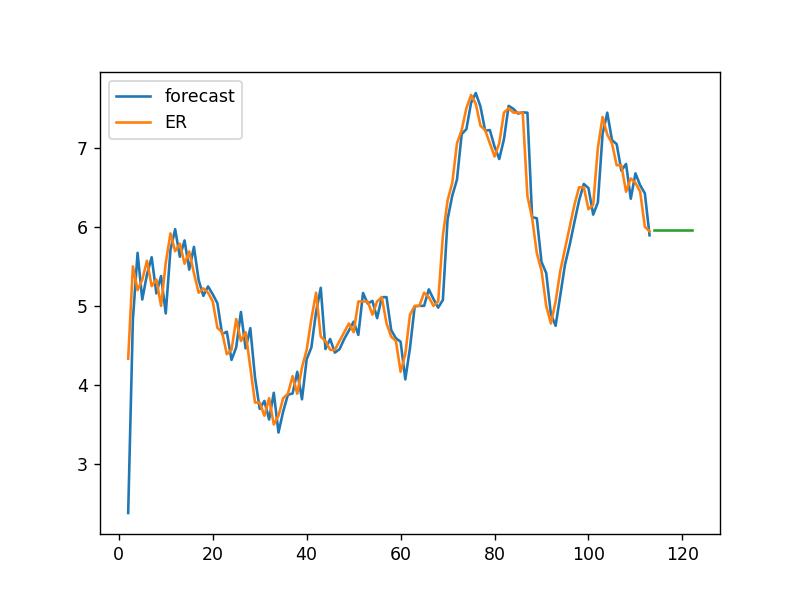

예측값             0
114  5.956982
115  5.956982
116  5.956982
117  5.956982
118  5.956982
119  5.956982
120  5.956982
121  5.956982
122  5.956982


In [24]:
#SK ER
modeling(er_SK,(0,1,1),9,'NC')

                             ARIMA Model Results                              
Dep. Variable:                   D.ER   No. Observations:                  110
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 -31.002
Method:                       css-mle   S.D. of innovations              0.321
Date:                Sat, 26 Sep 2020   AIC                             68.005
Time:                        11:34:20   BIC                             76.106
Sample:                             1   HQIC                            71.291
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.ER    -0.0185      0.093     -0.199      0.842      -0.200       0.163
ar.L2.D.ER    -0.2226      0.096     -2.313      0.021      -0.411      -0.034
                                    Roots           

<IPython.core.display.Javascript object>


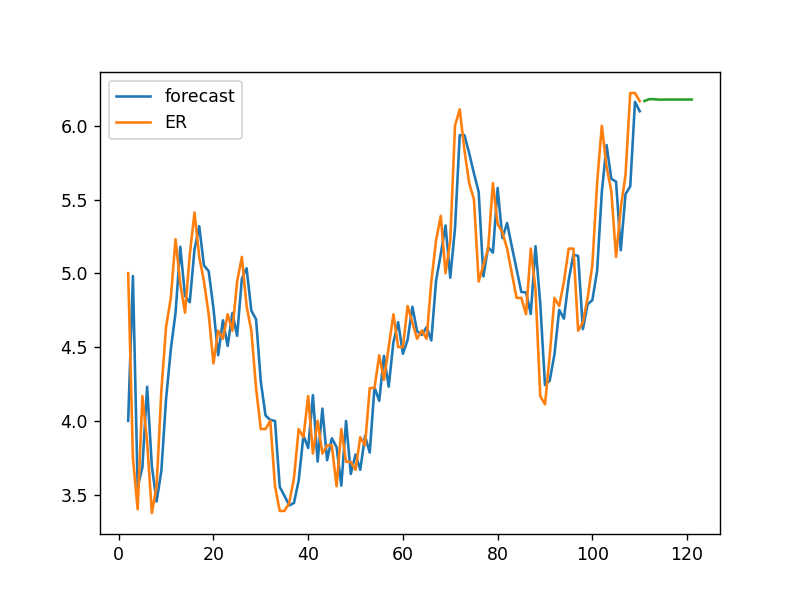

예측값             0
111  6.168017
112  6.180241
113  6.179789
114  6.177076
115  6.177227
116  6.177828
117  6.177783
118  6.177650
119  6.177663
120  6.177692
121  6.177689


In [26]:
#SS ER
modeling(er_SS,(2,1,0),11,'NC')

                              ARMA Model Results                              
Dep. Variable:                     ER   No. Observations:                  117
Model:                     ARMA(1, 1)   Log Likelihood                 -37.002
Method:                       css-mle   S.D. of innovations              0.327
Date:                Sat, 26 Sep 2020   AIC                             82.004
Time:                        11:35:06   BIC                             93.052
Sample:                             0   HQIC                            86.489
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7488      0.985      3.805      0.000       1.818       5.680
ar.L1.ER       0.9635      0.033     29.261      0.000       0.899       1.028
ma.L1.ER       0.3425      0.098      3.484      0.0

<IPython.core.display.Javascript object>


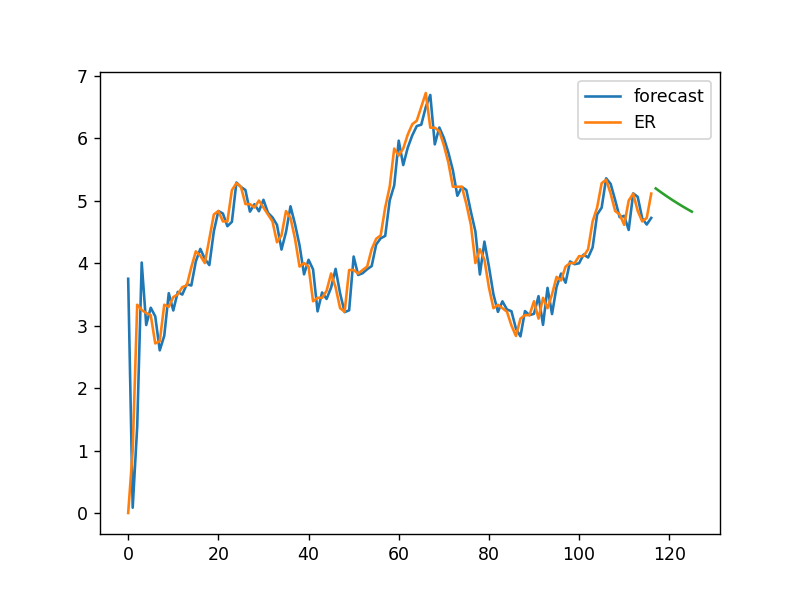

예측값             0
117  5.194384
118  5.141680
119  5.090896
120  5.041965
121  4.994817
122  4.949388
123  4.905616
124  4.863439
125  4.822801


In [27]:
#WO ER
modeling(er_WO,(1,0,1),9)

# WLS
HH 302<br>
HT 010<br>
KT 010<br>
LG 102<br>
LT 103<br>
NC 010<br>
OB 411<br>
SK 010<br>
SS 010<br>
WO 100<br> 

                              ARMA Model Results                              
Dep. Variable:                    WLS   No. Observations:                  110
Model:                     ARMA(3, 2)   Log Likelihood                 156.282
Method:                       css-mle   S.D. of innovations              0.057
Date:                Sat, 26 Sep 2020   AIC                           -298.564
Time:                        11:36:23   BIC                           -279.661
Sample:                             0   HQIC                          -290.897
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3988      0.144      2.769      0.006       0.117       0.681
ar.L1.WLS      0.3508      0.110      3.196      0.001       0.136       0.566
ar.L2.WLS     -0.0066      0.146     -0.045      0.9

<IPython.core.display.Javascript object>


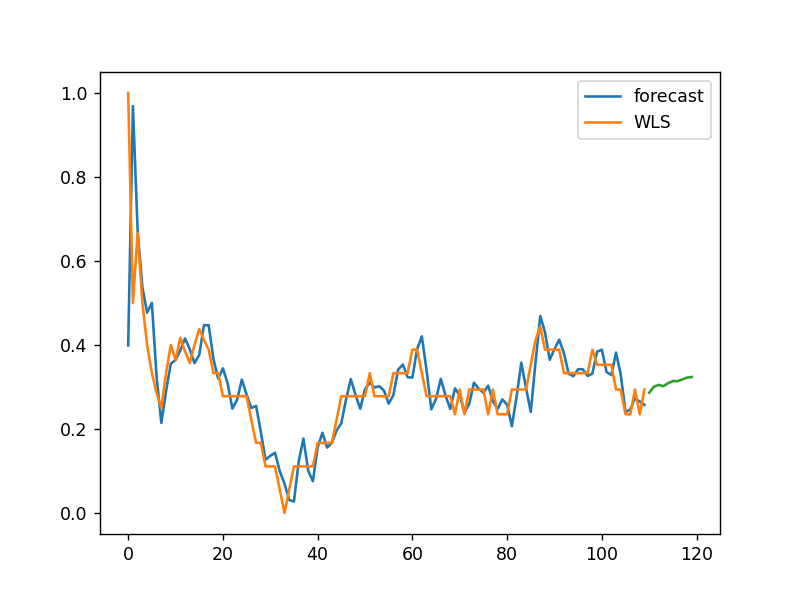

예측값             0
110  0.286332
111  0.300901
112  0.304992
113  0.301925
114  0.309193
115  0.314113
116  0.314029
117  0.318142
118  0.322412
119  0.323835


In [30]:
#HH WLS
modeling(wls_HH,(3,0,2),10)

                             ARIMA Model Results                              
Dep. Variable:                  D.WLS   No. Observations:                  108
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 164.027
Method:                       css-mle   S.D. of innovations              0.053
Date:                Sat, 26 Sep 2020   AIC                           -322.054
Time:                        11:37:28   BIC                           -314.008
Sample:                             1   HQIC                          -318.792
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ar.L1.D.WLS    -0.0377      0.094     -0.400      0.689      -0.222       0.147
ar.L2.D.WLS    -0.2560      0.116     -2.199      0.028      -0.484      -0.028
                                    Roots       

<IPython.core.display.Javascript object>


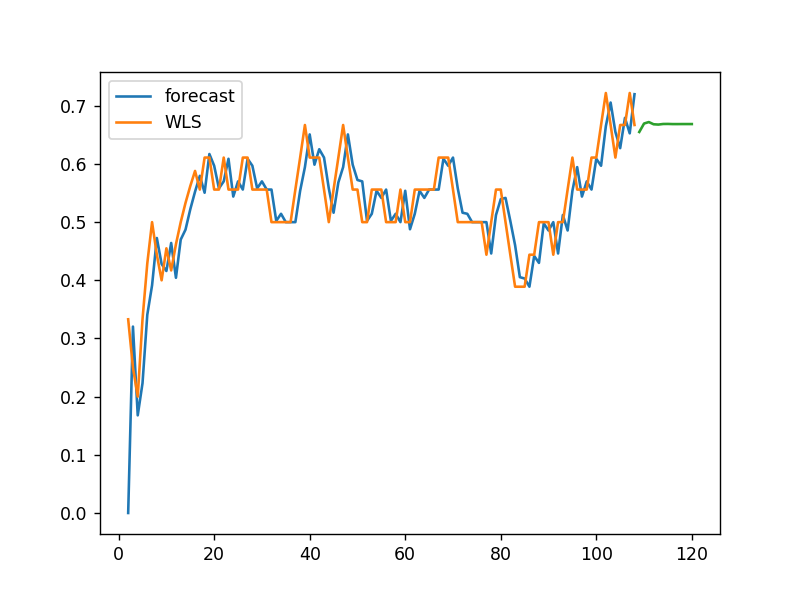

예측값             0
109  0.654993
110  0.669528
111  0.672054
112  0.668237
113  0.667735
114  0.668731
115  0.668822
116  0.668563
117  0.668550
118  0.668617
119  0.668617
120  0.668600


In [32]:
#HH WLS
modeling(wls_HT,(2,1,0),12,'nc')

                             ARIMA Model Results                              
Dep. Variable:                  D.WLS   No. Observations:                  111
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 184.493
Method:                       css-mle   S.D. of innovations              0.046
Date:                Sat, 26 Sep 2020   AIC                           -364.986
Time:                        11:38:40   BIC                           -359.567
Sample:                             1   HQIC                          -362.788
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ar.L1.D.WLS     0.0705      0.095      0.743      0.457      -0.115       0.256
                                    Roots                                    
                  Real          Imaginary         

<IPython.core.display.Javascript object>


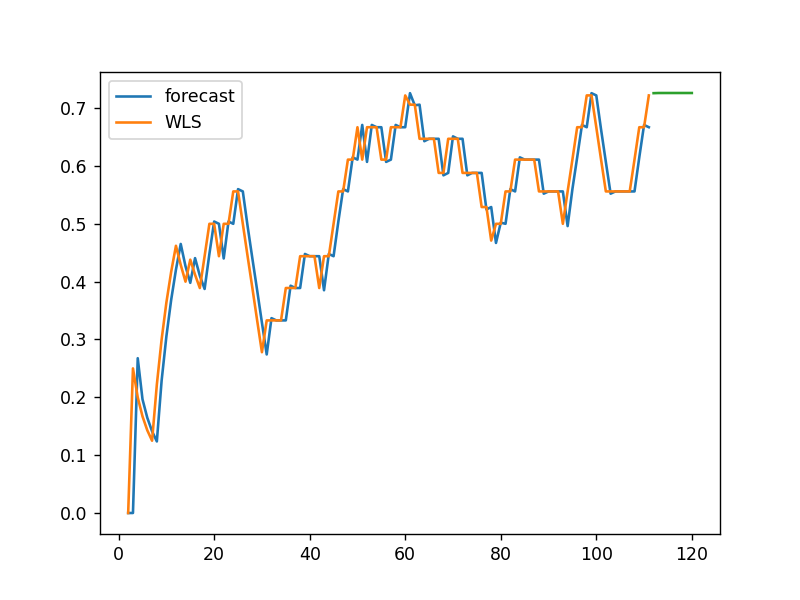

예측값             0
112  0.725878
113  0.726151
114  0.726170
115  0.726172
116  0.726172
117  0.726172
118  0.726172
119  0.726172
120  0.726172


In [34]:
#KT WLS
modeling(wls_KT,(1,1,0),9,'nc')

                              ARMA Model Results                              
Dep. Variable:                    WLS   No. Observations:                  113
Model:                     ARMA(1, 2)   Log Likelihood                 161.686
Method:                       css-mle   S.D. of innovations              0.057
Date:                Sat, 26 Sep 2020   AIC                           -313.373
Time:                        11:40:46   BIC                           -299.736
Sample:                             0   HQIC                          -307.839
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6066      0.047     12.980      0.000       0.515       0.698
ar.L1.WLS      0.7576      0.088      8.580      0.000       0.585       0.931
ma.L1.WLS      0.4890      0.081      6.017      0.0

<IPython.core.display.Javascript object>


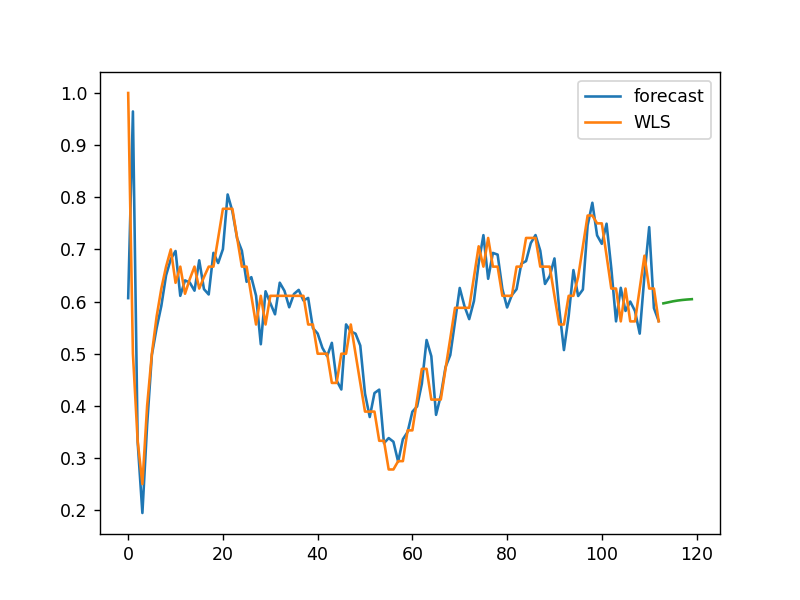

예측값             0
113  0.596592
114  0.598490
115  0.600457
116  0.601947
117  0.603075
118  0.603931
119  0.604579


In [35]:
#LG WLS
modeling(wls_LG,(1,0,2),7)

                              ARMA Model Results                              
Dep. Variable:                    WLS   No. Observations:                  110
Model:                     ARMA(1, 3)   Log Likelihood                 192.675
Method:                       css-mle   S.D. of innovations              0.041
Date:                Sat, 26 Sep 2020   AIC                           -373.350
Time:                        11:41:11   BIC                           -357.147
Sample:                             0   HQIC                          -366.778
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5777      0.099      5.835      0.000       0.384       0.772
ar.L1.WLS      0.9494      0.037     25.675      0.000       0.877       1.022
ma.L1.WLS     -0.0277      0.099     -0.280      0.7

<IPython.core.display.Javascript object>


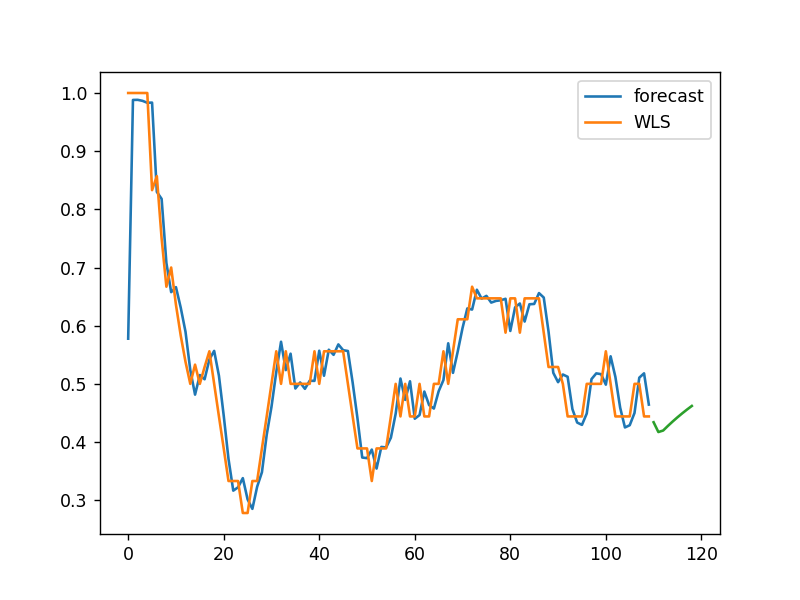

예측값             0
110  0.434011
111  0.417183
112  0.419772
113  0.427759
114  0.435342
115  0.442542
116  0.449377
117  0.455867
118  0.462028


In [37]:
#LT WLS
modeling(wls_LT,(1,0,3),9)

                             ARIMA Model Results                              
Dep. Variable:                  D.WLS   No. Observations:                  109
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 193.556
Method:                       css-mle   S.D. of innovations              0.041
Date:                Sat, 26 Sep 2020   AIC                           -383.111
Time:                        13:08:09   BIC                           -377.728
Sample:                             1   HQIC                          -380.928
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ar.L1.D.WLS    -0.1317      0.094     -1.394      0.163      -0.317       0.053
                                    Roots                                    
                  Real          Imaginary         

<IPython.core.display.Javascript object>


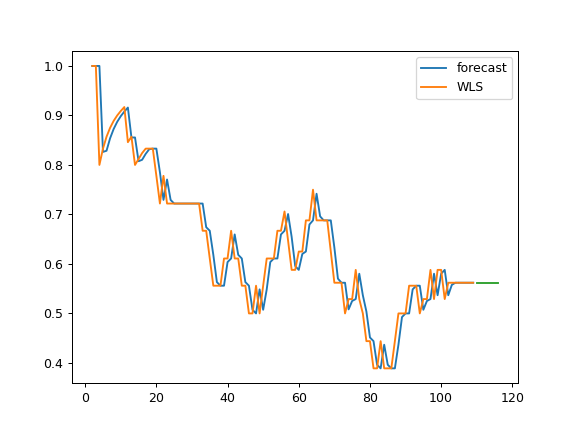

예측값          0
110  0.562
111  0.562
112  0.562
113  0.562
114  0.562
115  0.562
116  0.562


In [9]:
#NC WLS
modeling(wls_NC,(1,1,0),7,'NC')

                             ARIMA Model Results                              
Dep. Variable:                  D.WLS   No. Observations:                  111
Model:                 ARIMA(4, 1, 1)   Log Likelihood                 160.125
Method:                       css-mle   S.D. of innovations              0.057
Date:                Sat, 26 Sep 2020   AIC                           -308.249
Time:                        13:09:16   BIC                           -291.992
Sample:                             1   HQIC                          -301.654
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ar.L1.D.WLS     0.7943      0.159      4.981      0.000       0.482       1.107
ar.L2.D.WLS    -0.4144      0.142     -2.913      0.004      -0.693      -0.136
ar.L3.D.WLS     0.7517      0.142      5.279    

<IPython.core.display.Javascript object>


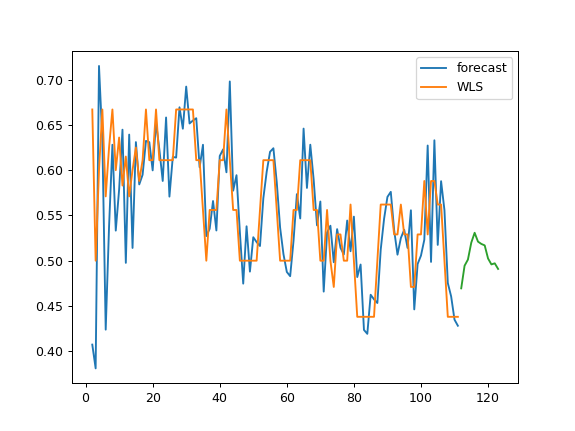

예측값             0
112  0.469447
113  0.494425
114  0.501232
115  0.519926
116  0.530825
117  0.521045
118  0.518503
119  0.516900
120  0.502430
121  0.495881
122  0.497079
123  0.490883


In [12]:
#OB WLS
modeling(wls_OB,(4,1,1),12,'nc')

                              ARMA Model Results                              
Dep. Variable:                    WLS   No. Observations:                  114
Model:                     ARMA(1, 0)   Log Likelihood                 156.880
Method:                       css-mle   S.D. of innovations              0.061
Date:                Sat, 26 Sep 2020   AIC                           -307.759
Time:                        13:12:08   BIC                           -299.551
Sample:                             0   HQIC                          -304.428
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3089      0.049      6.346      0.000       0.214       0.404
ar.L1.WLS      0.8891      0.046     19.532      0.000       0.800       0.978
                                    Roots           

<IPython.core.display.Javascript object>


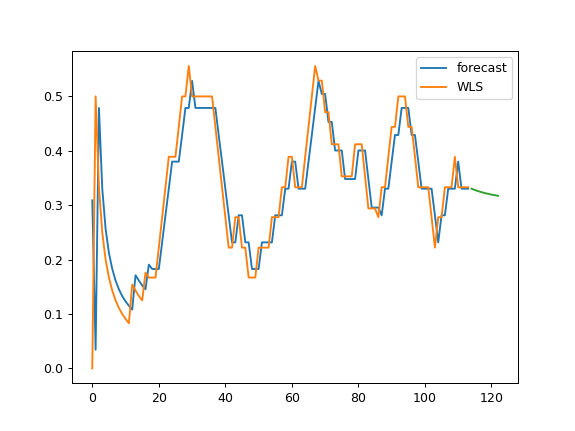

예측값             0
114  0.330332
115  0.327959
116  0.325850
117  0.323975
118  0.322307
119  0.320824
120  0.319506
121  0.318334
122  0.317292


In [14]:
#SK WLS
modeling(wls_SK,(1,0,0),9)

                              ARMA Model Results                              
Dep. Variable:                    WLS   No. Observations:                  111
Model:                     ARMA(1, 0)   Log Likelihood                 175.680
Method:                       css-mle   S.D. of innovations              0.049
Date:                Sat, 26 Sep 2020   AIC                           -347.359
Time:                        13:14:21   BIC                           -341.940
Sample:                             0   HQIC                          -345.161
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.WLS      0.9915      0.008    127.531      0.000       0.976       1.007
                                    Roots                                    
                  Real          Imaginary           M

<IPython.core.display.Javascript object>


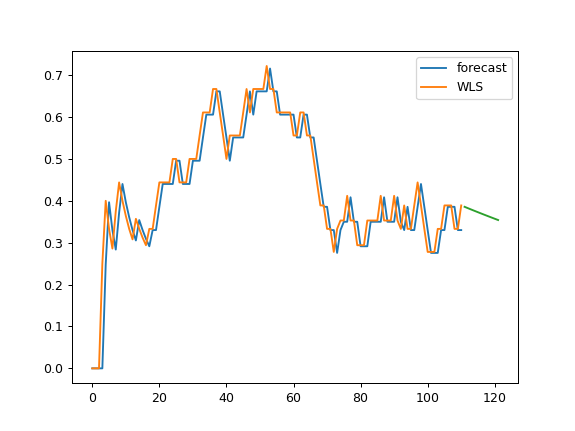

예측값             0
111  0.385696
112  0.382420
113  0.379171
114  0.375950
115  0.372757
116  0.369591
117  0.366451
118  0.363338
119  0.360252
120  0.357192
121  0.354158


In [18]:
#SS WLS
modeling(wls_SS,(1,0,0),11,'NC')

                              ARMA Model Results                              
Dep. Variable:                    WLS   No. Observations:                  117
Model:                     ARMA(1, 0)   Log Likelihood                 179.554
Method:                       css-mle   S.D. of innovations              0.052
Date:                Sat, 26 Sep 2020   AIC                           -353.109
Time:                        13:14:38   BIC                           -344.822
Sample:                             0   HQIC                          -349.744
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6209      0.071      8.744      0.000       0.482       0.760
ar.L1.WLS      0.9385      0.038     24.473      0.000       0.863       1.014
                                    Roots           

<IPython.core.display.Javascript object>


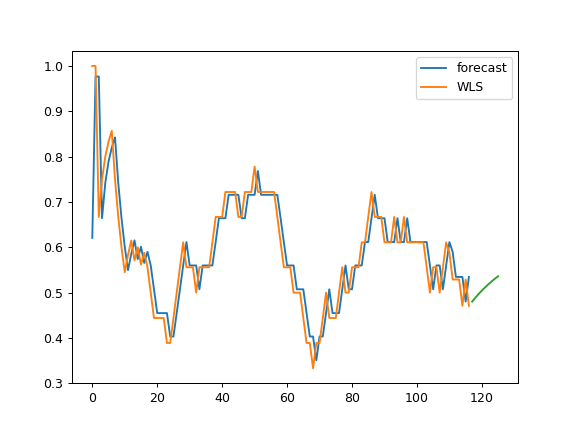

예측값             0
117  0.480210
118  0.488853
119  0.496965
120  0.504579
121  0.511725
122  0.518432
123  0.524726
124  0.530634
125  0.536178


In [19]:
#WO WLS
modeling(wls_WO,(1,0,0),9)